**DATA SET VIDEOS DE YOUTUBE** https://www.kaggle.com/datasets/mohamedwael001/youtube-videos-mega-dataset-40000-entries?select=40000_yt_videos.csv

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohamedwael001/youtube-videos-mega-dataset-40000-entries")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'youtube-videos-mega-dataset-40000-entries' dataset.
Path to dataset files: /kaggle/input/youtube-videos-mega-dataset-40000-entries


In [79]:
!ls /kaggle/input/youtube-videos-mega-dataset-40000-entries

40000_yt_videos.csv


In [80]:
PATH_CSV = path + '/' + '40000_yt_videos.csv'

In [81]:
df = pd.read_csv(PATH_CSV)
df

,video_id,title,description,category_id,views,likes,comments,duration_sec,publish_date,channel_id,channel_name,subscriber_count
0,L0pyYI75e3k,Ludwig Reacts to the America’s Hardest Game Wo...,video reacted: https://youtu.be/uW6yAgGSdQA?si...,20,1409321,31517,252,697.0,2024-12-22T09:53:26Z,UCz6XquIbM5OcfK7r3hQQCXA,Ludwin,1250000.0
1,zPmqbtKwtgw,Your Old PC is Your New Server,Thanks to Pulseway for sponsoring this video! ...,28,6589901,236551,9035,667.0,2021-12-13T18:00:26Z,UCXuqSBlHAE6Xw-yeJA0Tunw,Linus Tech Tips,16600000.0
2,Pl74ybpyNLk,The Scandinavian Hygge Lifestyle Taking The Wo...,Hygge is a Danish term defined as “a quality o...,25,1527301,22102,1838,293.0,2017-02-27T21:51:15Z,UCZaT_X_mc0BI-djXOlfhqWQ,VICE News,9260000.0
3,LDfBGgaNmk4,K-POP CHANGED MY LIFE,"This week, I decided to do another react video...",22,234584,18848,1103,349.0,2017-03-18T22:00:00Z,UC7zsxKqd5MicTf4VhS9Y74g,Kurtis Conner,5550000.0
4,cegdR0GiJl4,Die Antwoord - Enter The Ninja (Explicit Version),Music video by Die Antwoord performing Enter T...,10,101811893,679505,58712,313.0,2010-08-03T18:16:22Z,UC27mFz8e4kgh31Zh8k64Qyg,DieAntwoordVEVO,652000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
39992,gNXGb8cZumY,DJI Mini 3 Pro: The Complete Beginners Guide,Here's your massive DJI Mini 3 Pro complete be...,17,1823694,32486,1862,2952.0,2022-05-12T12:32:10Z,UC6y_DbpezOinlzHv8O092zw,DC Rainmaker,622000.0
39993,9pli9ASr9HE,American Idol but it's a horrible PS2 game,American Idol is the most popular show on TV r...,20,2062156,72591,4720,871.0,2019-02-19T20:00:00Z,UCdoPCztTOW7BJUPk2h5ttXA,Call Me Kevin,3640000.0
39994,xlNiz_ustjM,MEAL PREP for SUMMER | light & fresh recipes +...,My summer meal prep is finally here! Create an...,26,3098762,74118,2242,1216.0,2018-08-19T16:22:53Z,UCYidQwKhM3WTDKpT8pwfJzw,Downshiftology,2710000.0
39995,9PfiHIDWW_M,The Tudor Christmas kitchen,"As the festive season gathers pace, join Mark ...",29,752768,9537,578,3880.0,2020-12-04T16:08:47Z,UCnfeEeqQ7MGelnSwFlswQAw,The Landmark Trust,17200.0


**EDA**

In [82]:
df.dtypes

,0
video_id,object
title,object
description,object
category_id,int64
views,int64
likes,int64
comments,int64
duration_sec,float64
publish_date,object
channel_id,object


In [83]:

df.dtypes.value_counts()

,count
object,6
int64,4
float64,2


# **TRATAMIENTO DE NULOS**

In [84]:
df.isnull().sum()

,0
video_id,0
title,0
description,525
category_id,0
views,0
likes,0
comments,0
duration_sec,7
publish_date,0
channel_id,0


In [85]:
df.shape

(39997, 12)

In [86]:
df_cleaned = df.dropna()
df_cleaned.shape

(39466, 12)

# Aquí borraremos IDs y textos largos que no entran al modelo matemático directamente.

In [87]:
cols_a_eliminar = ['video_id', 'title', 'description', 'channel_id', 'channel_name', 'publish_date']
df_ml = df_cleaned.drop(columns=cols_a_eliminar)
print("\nColumnas restantes para el modelo:")
print(df_ml.columns.tolist())


Columnas restantes para el modelo:
['category_id', 'views', 'likes', 'comments', 'duration_sec', 'subscriber_count']


# Guardamos el dataset limpio

In [88]:
df_ml.to_csv('youtube_clean.csv', index=None)
print("\n✅ Archivo 'youtube_clean.csv' generado exitosamente.")


✅ Archivo 'youtube_clean.csv' generado exitosamente.


In [89]:
df_cleaned = df_cleaned.drop(columns=['video_id', 'title', 'description', 'publish_date', 'channel_id', 'channel_name'])
df_cleaned

,category_id,views,likes,comments,duration_sec,subscriber_count
0,20,1409321,31517,252,697.0,1250000.0
1,28,6589901,236551,9035,667.0,16600000.0
2,25,1527301,22102,1838,293.0,9260000.0
3,22,234584,18848,1103,349.0,5550000.0
4,10,101811893,679505,58712,313.0,652000.0
...,...,...,...,...,...,...
39992,17,1823694,32486,1862,2952.0,622000.0
39993,20,2062156,72591,4720,871.0,3640000.0
39994,26,3098762,74118,2242,1216.0,2710000.0
39995,29,752768,9537,578,3880.0,17200.0


In [90]:
df_cleaned.dtypes

,0
category_id,int64
views,int64
likes,int64
comments,int64
duration_sec,float64
subscriber_count,float64


In [91]:
df_cleaned.describe()

,category_id,views,likes,comments,duration_sec,subscriber_count
count,39466.000000,3.946600e+04,3.946600e+04,3.946600e+04,39466.000000,3.946600e+04
mean,21.742234,8.207159e+06,1.199243e+05,6.130725e+03,1295.970658,9.913328e+06
std,6.407934,4.997501e+07,4.582198e+05,2.356024e+04,2783.748664,2.155422e+07
min,1.000000,5.050000e+02,0.000000e+00,0.000000e+00,6.000000,3.030000e+02
25%,20.000000,5.803842e+05,9.165500e+03,4.460000e+02,488.000000,8.590000e+05
50%,23.000000,1.887386e+06,3.390100e+04,1.625000e+03,772.000000,3.700000e+06
75%,26.000000,5.627699e+06,1.108310e+05,5.101000e+03,1185.750000,1.180000e+07
max,29.000000,3.725325e+09,5.709683e+07,2.122361e+06,114871.000000,4.540000e+08


# ANALISIS DE VARIABLES

In [92]:
variable = 'views'
data = df_cleaned[variable]

In [93]:
mean_val = data.mean()
median_val = data.median()
mode_val = data.mode()[0]

print(f"📊 Medidas de tendencia central de {variable}")
print(f"Media (μ): {mean_val:.2f}")
print(f"Mediana: {median_val:.2f}")
print(f"Moda: {mode_val:.2f}")

📊 Medidas de tendencia central de views
Media (μ): 8207159.45
Mediana: 1887386.00
Moda: 341978.00


In [94]:
variance_val = data.var()
std_val = data.std()
range_val = data.max() - data.min()
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
print(f"\n📈 Medidas de dispersión de {variable}")
print(f"Varianza (σ²): {variance_val:.2f}")
print(f"Desviación estándar (σ): {std_val:.2f}")
print(f"Rango: {range_val:.2f}")
print(f"Rango intercuartílico (IQR): {iqr:.2f}")


📈 Medidas de dispersión de views
Varianza (σ²): 2497502076763940.50
Desviación estándar (σ): 49975014.52
Rango: 3725324697.00
Rango intercuartílico (IQR): 5047314.75


# Identificación de outliers con la regla de IQR

In [95]:
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

outliers = data[(data < limite_inferior) | (data > limite_superior)]

print(f"\n⚠️ Detección de Outliers (Regla del IQR) para {variable}")
print(f"Límite inferior: {limite_inferior:.2f}")
print(f"Límite superior: {limite_superior:.2f}")
print(f"Número de outliers detectados: {len(outliers)}")


⚠️ Detección de Outliers (Regla del IQR) para views
Límite inferior: -6990587.88
Límite superior: 13198671.12
Número de outliers detectados: 4590


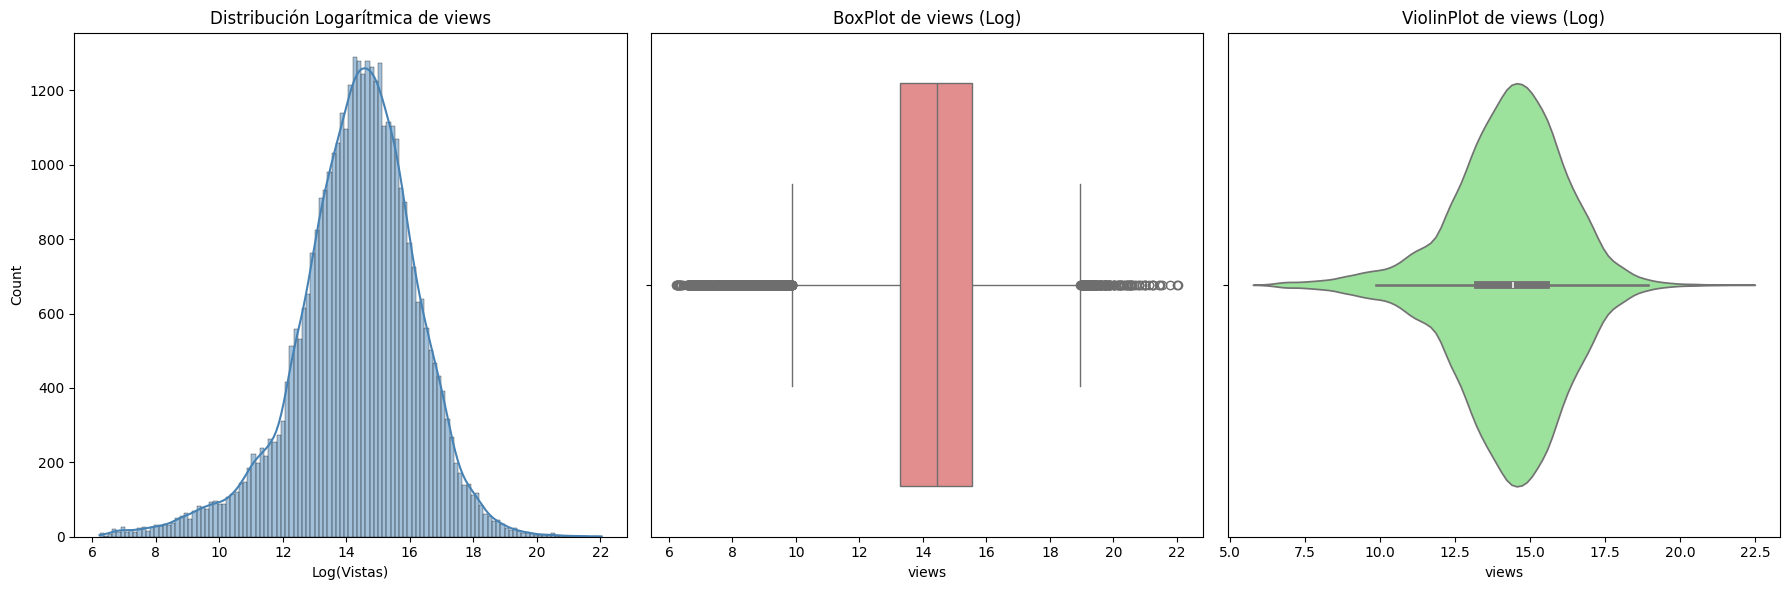

In [96]:
data_log = np.log1p(df_cleaned[variable])

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Histograma (con escala logarítmica)
sns.histplot(data_log, kde=True, color='steelblue', ax=axes[0])
axes[0].set_title(f'Distribución Logarítmica de {variable}')
axes[0].set_xlabel('Log(Vistas)')

# 2. BoxPlot (para ver la dispersión y medianas)
sns.boxplot(x=data_log, color='lightcoral', ax=axes[1])
axes[1].set_title(f'BoxPlot de {variable} (Log)')

# 3. ViolinPlot (para ver la densidad de videos)
sns.violinplot(x=data_log, color='lightgreen', ax=axes[2])
axes[2].set_title(f'ViolinPlot de {variable} (Log)')

plt.tight_layout()
plt.show()

# ELIMINAR OUTLIERS

In [97]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [98]:
df_cleaned = remove_outliers(df_cleaned,variable)
data = df_cleaned[variable]

In [99]:
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

outliers = data[(data < limite_inferior) | (data > limite_superior)]

print(f"\n⚠️ Detección de Outliers (Regla del IQR) para {variable}")
print(f"Límite inferior: {limite_inferior:.2f}")
print(f"Límite superior: {limite_superior:.2f}")
print(f"Número de outliers detectados: {len(outliers)}")


⚠️ Detección de Outliers (Regla del IQR) para views
Límite inferior: -6990587.88
Límite superior: 13198671.12
Número de outliers detectados: 0


In [100]:
df_cleaned

,category_id,views,likes,comments,duration_sec,subscriber_count
0,20,1409321,31517,252,697.0,1250000.0
1,28,6589901,236551,9035,667.0,16600000.0
2,25,1527301,22102,1838,293.0,9260000.0
3,22,234584,18848,1103,349.0,5550000.0
5,26,117209,2878,483,1003.0,2300000.0
...,...,...,...,...,...,...
39992,17,1823694,32486,1862,2952.0,622000.0
39993,20,2062156,72591,4720,871.0,3640000.0
39994,26,3098762,74118,2242,1216.0,2710000.0
39995,29,752768,9537,578,3880.0,17200.0


In [101]:
df_cleaned.to_csv('youtube_clean_final.csv',index=None)

In [102]:
# Verificación rápida del archivo generado
test_df = pd.read_csv('youtube_clean_final.csv')
print(f"Columnas guardadas: {test_df.columns.tolist()}")
print(f"Total de registros: {test_df.shape[0]}")

Columnas guardadas: ['category_id', 'views', 'likes', 'comments', 'duration_sec', 'subscriber_count']
Total de registros: 34876
